# Практическая работа №6
Самсоненко Станислав Владимирович ИКБО-01-20


## 1. Предобработка данных

In [110]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import plotly.graph_objects as go

In [111]:
# Найти данные для кластеризации. Данные в группе не должны повторяться.
df = pd.read_csv('ObesityDataSet.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


Ожирение или риск сердечно-сосудистых заболеваний



О наборе данных
Данные представляют собой оценку уровня ожирения у жителей Мексики, Перу и Колумбии в возрасте от 14 до 61 года с различными пищевыми привычками и физическим состоянием. Сбор данных осуществлялся с помощью веб-платформы с опросом, где анонимные пользователи отвечали на каждый вопрос, затем информация была обработана с получением 17 атрибутов и 2111 записей.
К атрибутам, связанным с пищевыми привычками, относятся: Частое потребление высококалорийной пищи (FAVC), Частота потребления овощей (FCVC), Количество основных приемов пищи (NCP), Потребление пищи между приемами пищи (CAEC), Потребление воды в день (CH20) и Потребление алкоголя (CALC). К атрибутам, связанным с физическим состоянием, относятся: Контроль потребления калорий (SCC), Частота физической активности (FAF), Время использования технологических устройств (TUE), Используемый транспорт (MTRANS).

In [112]:
df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [113]:
# Проверим данные на наличие дубликатов
sum(df.duplicated())

24

In [114]:
df = df.drop_duplicates()

In [115]:
sum(df.duplicated())

0

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2087 non-null   object 
 1   Age                             2087 non-null   float64
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   family_history_with_overweight  2087 non-null   object 
 5   FAVC                            2087 non-null   object 
 6   FCVC                            2087 non-null   float64
 7   NCP                             2087 non-null   float64
 8   CAEC                            2087 non-null   object 
 9   SMOKE                           2087 non-null   object 
 10  CH2O                            2087 non-null   float64
 11  SCC                             2087 non-null   object 
 12  FAF                             2087 no

In [117]:
# Приведём категориальные признаки к числовому виду
df = pd.get_dummies(df, drop_first=True)
df

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,...,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000,False,True,...,False,False,True,False,True,False,False,False,False,False
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000,False,True,...,False,False,True,False,True,False,False,False,False,False
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000,True,True,...,False,False,True,False,True,False,False,False,False,False
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000,True,False,...,False,False,False,True,False,False,False,False,True,False
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000,True,False,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247,False,True,...,False,False,True,False,False,False,False,True,False,False
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270,False,True,...,False,False,True,False,False,False,False,True,False,False
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288,False,True,...,False,False,True,False,False,False,False,True,False,False
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035,False,True,...,False,False,True,False,False,False,False,True,False,False


In [118]:
# Если признаки в данных имеют очень сильно разные масштабы, то необходимо данные предварительно нормализовать.
from sklearn.preprocessing import StandardScaler

columns_to_standartize = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
df[columns_to_standartize] = StandardScaler().fit_transform(df[columns_to_standartize])
df

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,...,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II
0,-0.526613,-0.887408,-0.872985,-0.788364,0.390906,-0.007810,-1.186977,0.554211,False,True,...,False,False,True,False,True,False,False,False,False,False
1,-0.526613,-1.960788,-1.178508,1.082164,0.390906,1.636552,2.328908,-1.090505,False,True,...,False,False,True,False,True,False,False,False,False,False
2,-0.212507,1.044677,-0.376509,-0.788364,0.390906,-0.007810,1.156947,0.554211,True,True,...,False,False,True,False,True,False,False,False,False,False
3,0.415705,1.044677,0.005395,1.082164,0.390906,-0.007810,1.156947,-1.090505,True,False,...,False,False,False,True,False,False,False,False,True,False
4,-0.369560,0.830001,0.112328,-0.788364,-2.225418,-0.007810,-1.186977,-1.090505,True,False,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,-0.530250,0.086470,1.701376,1.082164,0.390906,-0.454848,0.777546,0.400014,False,True,...,False,False,True,False,False,False,False,True,False,False
2107,-0.372239,0.492788,1.790528,1.082164,0.390906,0.000626,0.385081,-0.104876,False,True,...,False,False,True,False,False,False,False,True,False,False
2108,-0.287258,0.531665,1.788482,1.082164,0.390906,0.081303,0.470422,-0.027545,False,True,...,False,False,True,False,False,False,False,True,False,False
2109,0.001389,0.394745,1.775393,1.082164,0.390906,1.393744,0.148013,-0.126644,False,True,...,False,False,True,False,False,False,False,True,False,False


## 2. Кластеризация алгоритмом K-Means

In [97]:
# Провести кластеризацию данных с помощью алгоритма k-means.
# Использовать «правило локтя» и коэффициент силуэта для поиска оптимального количества кластеров.
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")
scores: dict[str, list[float]] = {"inertia": [], "silhouette_score": []}
for i in range(2, 25):
    model = KMeans(n_clusters=i, random_state=42, init='k-means++').fit(df)
    scores['inertia'].append(model.inertia_)
    scores['silhouette_score'].append(silhouette_score(df, model.labels_))
scores

{'inertia': [18662.495555830672,
  16926.229965924143,
  15517.433729863282,
  14360.962567684512,
  13452.145647762916,
  12870.075262149907,
  12380.589171498963,
  12002.809074393153,
  11670.487401377963,
  11278.417453798766,
  11005.543414937176,
  10756.14236411767,
  10566.641574052615,
  10322.636618066372,
  10062.312343772674,
  9904.983132751351,
  9704.546072883935,
  9460.227668834437,
  9337.512720516721,
  9176.523469369786,
  9033.265855993484,
  8956.28166605438,
  8800.776410272547],
 'silhouette_score': [0.1299017581530865,
  0.12838016930606777,
  0.14955767687194182,
  0.14709568725776542,
  0.1535283406134262,
  0.1574013265982946,
  0.1474728687235665,
  0.14885843480679392,
  0.154646580459407,
  0.16074529977136928,
  0.16232940692989414,
  0.16467400863381898,
  0.16864862641341968,
  0.16117365688025095,
  0.17376784972341566,
  0.17573375659516943,
  0.17874823796772019,
  0.18273040597234994,
  0.18469793642294666,
  0.18101098090883466,
  0.18783890580082

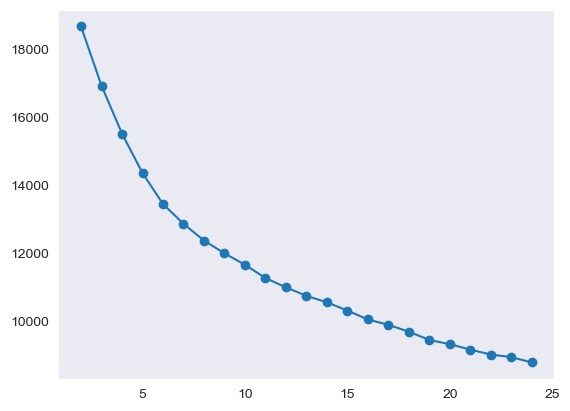

In [98]:
plt.grid()
plt.plot(np.arange(2, 25), scores['inertia'], marker = 'o')
plt.show()

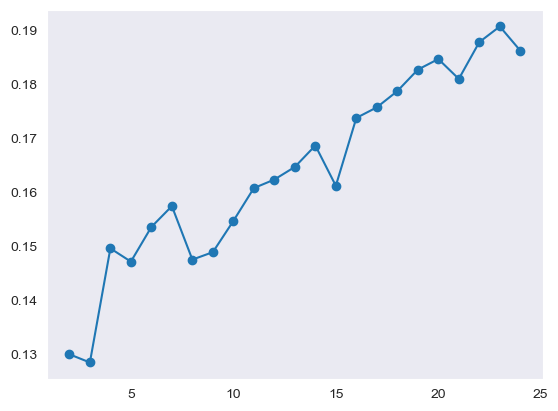

In [99]:
plt. grid()
plt.plot(np.arange(2,25), scores['silhouette_score'], marker= 'o')
plt.show()

Коэффициент силуэта достигает максимума при k = 24. Выполним кластеризацию методом K-means для 24 кластеров

In [100]:
model = KMeans(n_clusters=24,random_state=123, init='k-means++')
model.fit(df)
model.cluster_centers_

array([[-5.80446260e-01,  5.82501679e-01,  1.94243011e+00,
         1.08216361e+00,  3.90906145e-01,  4.70109470e-01,
         5.39123684e-01,  2.43404028e-01,  7.63358779e-03,
         1.00000000e+00,  1.00000000e+00,  7.63358779e-03,
         9.92366412e-01, -1.38777878e-17,  1.73472348e-17,
         5.55111512e-17,  7.63278329e-17,  1.00000000e+00,
         1.11022302e-16,  4.77048956e-18,  4.33680869e-18,
         1.00000000e+00,  2.42861287e-17,  3.88578059e-16,
         1.11022302e-16, -8.32667268e-17,  1.00000000e+00,
         2.49800181e-16, -1.66533454e-16],
       [ 3.06266364e-02, -6.05411660e-01,  7.77999004e-01,
         1.07724746e+00,  3.88799244e-01, -1.14205815e+00,
        -9.19446550e-01,  6.41611945e-02,  1.35135135e-02,
         9.86486486e-01,  1.00000000e+00, -5.55111512e-17,
         1.00000000e+00, -1.38777878e-17,  1.35135135e-02,
        -3.46944695e-17, -1.38777878e-17,  9.86486486e-01,
         1.35135135e-02,  1.30104261e-18,  2.60208521e-18,
         1.00

In [101]:
labels = model.labels_
labels

array([ 8, 17, 19, ...,  0,  0,  0])

In [102]:
k_means_clustered = df.copy()
k_means_clustered['cluster'] = labels
k_means_clustered['cluster'].value_counts()

cluster
4     147
10    140
0     131
7     125
14    116
16    114
20    107
19    105
17     95
11     94
5      89
8      85
3      84
12     78
1      74
15     72
13     68
9      67
6      64
21     60
23     49
22     47
18     43
2      33
Name: count, dtype: int64

## 3. Кластеризация иерархическим алгоритмом 

In [103]:
# Провести кластеризацию данных с помощью алгоритма иерархической кластеризации.
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(24, compute_distances = True)
clastering = model.fit(df)

hierarchy_clustered = df.copy()
hierarchy_clustered['cluster'] = clastering.labels_

In [104]:
hierarchy_clustered['cluster'].value_counts()

cluster
1     197
0     177
2     143
3     136
18    123
9     111
12     96
5      96
20     88
16     87
22     86
4      75
7      75
10     63
6      61
8      60
11     60
15     60
17     58
14     58
13     57
21     46
19     46
23     28
Name: count, dtype: int64

## 4. Кластеризация алгоритмом DBSCAN

2.6831866421326938


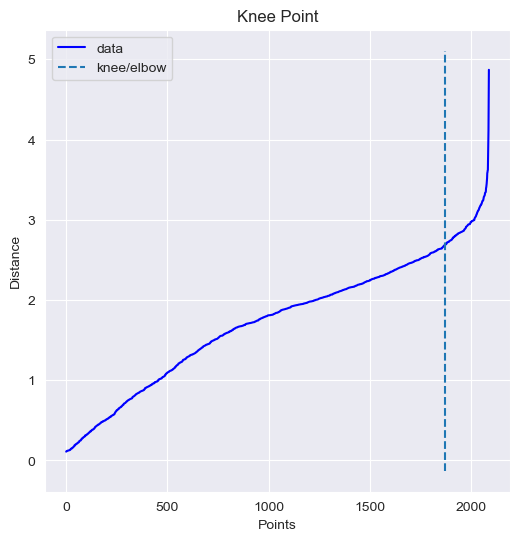

In [106]:
# Провести кластеризацию данных с помощью алгоритма DBSCAN.
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

# https://skine.ru/articles/258306/
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(df)
distances, indices = neighbors.kneighbors(df)

distances = np.sort(distances[:,10], axis=0)
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
print(distances[knee.knee])

In [107]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=2.68, min_samples=5).fit(df)
dbscan_clustered = df.copy()
dbscan_clustered['cluster'] = model.labels_
dbscan_clustered['cluster'].value_counts()

cluster
 0    2059
-1      28
Name: count, dtype: int64

## 5. Визуализация кластеризованных данных

In [108]:
# Визуализировать кластеризованные данные с помощью t-SNE или UMAP, если необходимо.
# Если данные трехмерные, то можно использовать трехмерный точечный график.

from sklearn.manifold import TSNE

def visualize_clusters(X, labels, algorithm, method='tsne', n_components=2):
    tsne = TSNE(n_components=n_components, random_state=42)
    X_reduced = tsne.fit_transform(X)

    # Визуализация результатов
    if n_components == 2:
        plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='viridis')
        plt.colorbar(label='Cluster Labels')
        plt.title(f"{method.upper()} Visualization of {algorithm}")
    elif n_components == 3:
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection='3d')
        scatter = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=labels, cmap='viridis')
        plt.colorbar(scatter, ax=ax, label='Cluster Labels')
        ax.set_title(f"{method.upper()} 3D Visualization of {algorithm}")

    plt.show()

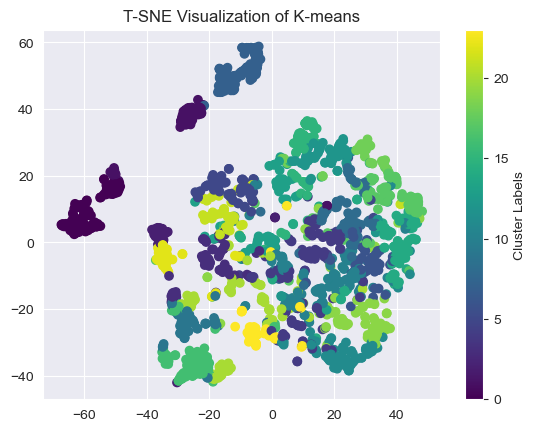

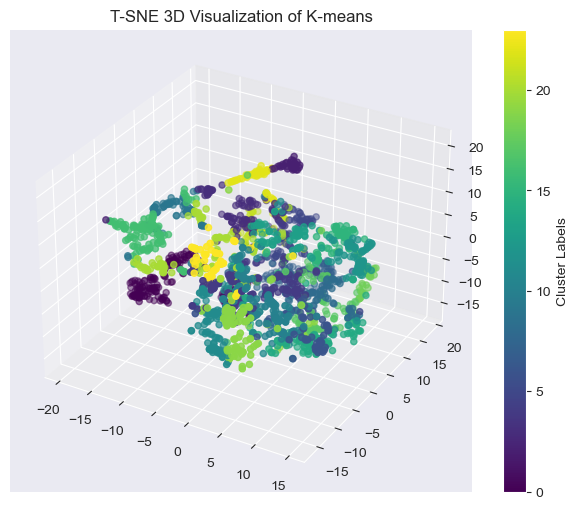

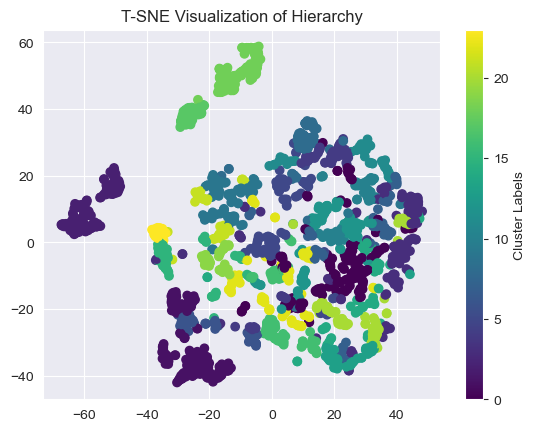

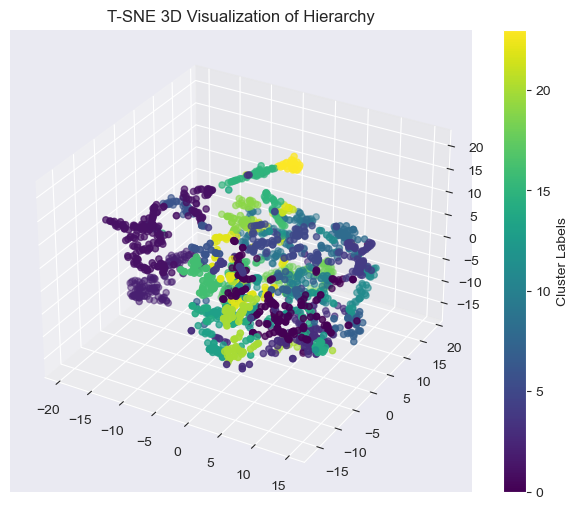

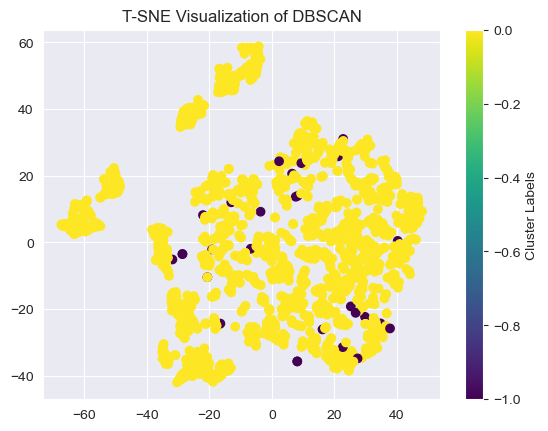

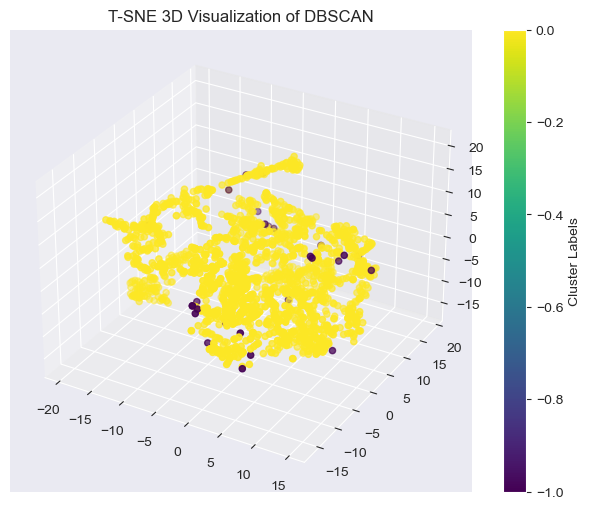

In [109]:
dims = [2, 3]
clusters = [
    {'name': 'K-means', 'data': k_means_clustered},
    {'name': 'Hierarchy', 'data': hierarchy_clustered},
    {'name': 'DBSCAN', 'data': dbscan_clustered},
]
for cluster in clusters:
    for dim in dims:
        visualize_clusters(
            X=df,
            labels=cluster['data']['cluster'],
            algorithm=cluster['name'],
            method='t-sne',
            n_components=dim
        )